# Word Embedding Models in NLP

Word embeddings are a modern approach for representing text in natural language processing (NLP).

Word embedding algorithms like [word2vec](https://israelg99.github.io/2017-03-23-Word2Vec-Explained/) and [GloVe](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795) are key to the state-of-the-art results achieved by __neural network models__ on NLP problems like text classification and/or machine translation.

In this tutorial, you will discover how to train and load word embedding models for NLP applications in Python using different packages.

After completing this tutorial, you will know:

- How to train your own word2vec word embedding model on text data.
- How to visualize a trained word embedding model using Principal Component Analysis (PCA).
- How to load pre-trained word2vec and GloVe word embedding models from Google and Stanford.

## What is word embedding?

Word embeddings are a way of representing words, to be given as input to a Deep learning model. It is considered the best available representation of words in NLP. In this method, each word is represented as a word vector in a predefined dimension. Higher the dimension richer its ability to incorporate the syntactic and semantic meaning of the word.

Although we do not have a formal definition of word embedding (an informal definition can be found on [wikipedia](https://en.wikipedia.org/wiki/Word_embedding)), in general word embedding models usually cover the following aspects:

- word-context(s) representation: word2vec
- global corpus statistics: GloVe
- word morphology: Subword
- word hierarchy in the WordNet terminology
- relationships between document/terms: latent semantic indexing (LSI)

The problem of choosing the best embeddings for a particular project is always the problem of try-and-fail approach, so realizing why in particular case one model works better than the other sufficiently helps in real work.
In fact, reliable word representation with real-number vector is the goal we’re trying to approach. Sounds easy, isn’t it?

In [ ]:
! pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In this tutorial, we will some sample corpus (_collection of documents) as the example datasets. You can always replace this dataset with any dataset you want.

In [ ]:
corpus1 = [
          'Text of first document.',
          'Text of the second document made longer.',
          'Number three.',
          'This is number four.',
]

corpus2 = ['this is the first sentence for word2vec.',
			'word2vec is a great word embedding method.',
			'word2vec represents words in real value vectors.',
			'word2vec is widely used in natural language processing.',
			'word2vec has various applications in different text analytics subareas.']

total_corpus = corpus1+ corpus2
print('Our corpus contains', len(total_corpus), 'sentences')

Our corpus contains 9 sentences


## Why word embedding?

Traditionally integer values and one-hot vectors are used to represent words. Not just words in NLP but any categorical variable in structured data can be seen in this light. One-hot encoder representation has its own drawbacks:
1. Vector length of each word representation is equal to a total number of unique words in the dictionary. In NLP application, this will make the vector length too big.
2. Different values of the variables can be represented with any relationship using one-hot vectors. Variables features cannot be represented and so the relationship between them. Ex: Day of the week, weekdays will have some sort of relationship and similarly weekends. In one-hot representation, it will not be able to make a distinction.

To overcome the above issues, there are two standard ways to pre-train word embeddings, one is word2vec, other GloVe short form for Global Vectors. These pre-trained models overcome the above drawbacks by letting us select much small dimension vector (compared to one hot vector) to represent the words keeping context in mind.

word2vec and Glove might be said to be to NLP what VGGNet is to vision, i.e. a common weight initialization that provides generally helpful features without the need for lengthy training. Word embeddings are useful for a wide variety of applications beyond NLP such as information retrieval, recommendation, and link prediction in knowledge bases, which all have their own task-specific approaches. Word embeddings are typically learned only based on the window of surrounding context words.

Now we can discuss some word embedding models. The first model is the `tokenizer` function in `keras`.

### `keras tokenizer` - the simplest word embedding model

`keras` provides a `tokenizer` function to preprocess the text data - it is essentially the _one-hot encoding_ of words in text. In other words, each word is replaced with its index in the vocabulary. We can use the following code example for the use of the `keras tokenizer`.

Keep in mind that the `Tokenizer` does not represent text (i.e. words) in real-value vectors, but simply __integers__.



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# to use the Tokenizer object, we need to define how many words we need to keep
# given the simple corpus we have, we can set a fairly low `max_words`
max_words = 100

In real world projects, you should consider set a higher value for `max_words` - possible values include: `5000`, `10000`, `20000`, ... Just note that the more `max_words` you include, the more complex your model will be, and the longer training time needed.

You need to define the `Tokenizer` object before using it. According to the [doc](https://keras.io/preprocessing/text/), the `Tokenizer` object should be defined this way:

```python
Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', \
char_level=False, oov_token=None, document_count=0)
```

The different arguments are listed as below:
- __num_words__: integer. The maximum number of words (`max_words`) to keep, based on word frequency. Only the most common `num_words-1` words will be kept.
- __filters__: a string where each element is a character that will be filtered from the texts. The default is all __punctuation__, plus __tabs__ and __line breaks__, minus the `'` character.
- __lower__: boolean. Whether to convert the texts to lowercase.
- __split__: str. Separator for word splitting (e.g. space, comma).
- __char_level__: if True, every character will be treated as a token instead of words.
- __oov_token__: if given, it will be added to word_index and used to replace __out-of-vocabulary__ words during text_to_sequence calls (e.g. we can use `'UNK'` to replace all __out-of-vocabulary__ words.

In [ ]:
tokenizer = Tokenizer(num_words=max_words)

Following are some of the methods in Keras tokenizer object:
```python
tokenizer.text_to_sequence()
```
This line of code tokenizes the input text by splitting the corpus into tokens of words an makes a list of them. Each unique word token is given corresponding dedicated integer value. For example a sentence: “I don’t like movies because movies are not real” becomes “5, 6,20,9,12,9,22,3,23” here I have taken random dedicated integers for a corresponding word. Word “movies” gets an integer “9”. The text is converted into a stream of integer strings replacing word tokens.

In [ ]:
tokenizer.fit_on_texts(corpus1)
tokenized_corpus1 = tokenizer.texts_to_sequences(corpus1)
tokenized_corpus1

[[1, 2, 5, 3], [1, 2, 6, 7, 3, 8, 9], [4, 10], [11, 12, 4, 13]]

The neural networks can only teke input of fixed length - but clearly the `tokenized_corpus1` contains sequences of various lengths. That is why we need the following method:

```python
pad_sequence(list_tokenized_train, maxlen=maxlen)
```
The `pad_sequence` takes two arguments, one tokenized text in the form of integers. Which is converted from the dataset using `text_to_sequence()` method. The second argument takes the maximum possible length of a sentence in the text corpus. We can set the `maxlen` by doing some analysis on the length of sentences in the dataset. Ideally, take the length of the longest sentence by removing outliers which are extremely long.

Taking these two arguments, `pad_sequence` makes the sentences in input dataset uniform in length. By padding sentences smaller than `maxlen` with empty values and by truncating the sentences longer than `maxlen`.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 7
padded_corpus1 = pad_sequences(tokenized_corpus1, maxlen=max_len)
padded_corpus1

array([[ 0,  0,  0,  1,  2,  5,  3],
       [ 1,  2,  6,  7,  3,  8,  9],
       [ 0,  0,  0,  0,  0,  4, 10],
       [ 0,  0,  0, 11, 12,  4, 13]], dtype=int32)

We notice that now in `padded_corpus` that all sequences are in the same length. Note that the `pad_sequence()` function can be used for any integer value sequences, not essentially text data. Also notice that the filler value `0` is added to the beginning of the sequences.

The other feature we may need is that to trace the integer (word index) back to the actual words. The `Tokenizer` object provides the following method:

```python
Tokenizer.word_index
```

This method of the `Tokenizer` returns all the unique words in the dataset, in a __dictionary__ format with __keys__ as _words_ and __values__ as the _index of the words_.

In [ ]:
tokenizer.word_index

{'text': 1,
 'of': 2,
 'document': 3,
 'number': 4,
 'first': 5,
 'the': 6,
 'second': 7,
 'made': 8,
 'longer': 9,
 'three': 10,
 'this': 11,
 'is': 12,
 'four': 13}

Another useful feature is that the `Tokenizer` object can return the word counts in your corpus.

In [ ]:
tokenizer.word_counts

OrderedDict([('text', 2),
             ('of', 2),
             ('first', 1),
             ('document', 2),
             ('the', 1),
             ('second', 1),
             ('made', 1),
             ('longer', 1),
             ('number', 2),
             ('three', 1),
             ('this', 1),
             ('is', 1),
             ('four', 1)])

Sometimes, the _one-hot encoding_ based method may not serve our needs. For instance, we may want a method that captures both the word occurrences (`word_index`) and word frequencies (`word_counts`). Although `keras` does not support such a function, we can rely on our old friend `sklearn`. `sklearn` provides a function `CountVectorizer` for this purpose.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# create CountVectorizer object
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus1)

# columns of X correspond to the result of this method
vectorizer.get_feature_names() == (
    ['document', 'first', 'four', 'is', 'longer',
     'made', 'number', 'of', 'second', 'text',
     'the', 'this', 'three'])

AttributeError: ignored

In [ ]:
# retrieving the matrix in the numpy form
X.toarray()

array([[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]])

We notice that after the `CountVectorizer` that the texts are of the __same__ length.

In [ ]:
# transforming a new document according to learn vocabulary
vectorizer.transform(['A new document.']).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

For instance, to the word `‘first’` in the given example corresponds vector `[1,0,0,0]`, which is the 2nd column of the matrix `X`. Sometimes the output of this method is called __sparse matrix__ as long as `X` has zeroes as the most elements of it and has sparsity as its feature.

## TF-IDF transforming
The idea behind this approach is term weighting by exploitation of useful statistical measure called tf-idf. Having a large corpus of documents, words like ‘a’, ‘the’, ‘is’, etc. occur very frequently, but they don’t carry a lot of information. Using one-hot encoding approach we see that vectors of these words are not-so-sparse, claiming, that these words are important and carry a lot of information if being in so many documents. One of the ways to solve this problem is stopwords filtering, but this solution is discrete and not flexible to the domain zone we’re working with.

Please refer to [this post](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795) for more details on this method.

## What is Word2vec?

Word2Vec is the first neural embedding model (or at least the first, which gained its popularity in 2013) and still the one, which is used by the most of researchers. Doc2Vec, its child, is also the most popular model for paragraphs representation, which was inspired by Word2Vec. In fact, many of the concepts we will be reviewing later are based on the Word2Vec prerequisites, so be sure to pay enough attention to this embeddings type.

[Word2vec](https://en.wikipedia.org/wiki/Word2vec) is one algorithm for learning a word embedding from a text corpus.

There are two main training algorithms that can be used to learn the embedding from text; they are continuous bag of words (CBOW) and skip grams.

We will not get into the algorithms other than to say that they generally look at a window of words for each target word to provide context and in turn meaning for words. The approach was developed by [Tomas Mikolov](https://en.wikipedia.org/wiki/Word2vec), formerly at Google and currently at Facebook.

Word2Vec models require a lot of text, e.g. the entire Wikipedia corpus. Nevertheless, we will demonstrate the principles using a small in-memory example of text.

Gensim provides the [Word2Vec class](https://radimrehurek.com/gensim/models/word2vec.html) for working with a Word2Vec model.

Learning a word embedding from text involves loading and organizing the text into sentences and providing them to the constructor of a new `Word2Vec()` instance.

In [ ]:
from gensim.models import word2vec

In [ ]:
# we need to pass splitted sentences to the model
tokenized_sentences = [sentence.split() for sentence in total_corpus]
model = word2vec.Word2Vec(tokenized_sentences, min_count=1)

The `tokenized_sentences` could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora.

There are many parameters on this constructor; a few noteworthy arguments you may wish to configure are:

- __size__: (default `100`) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
window: (default `5`) The maximum distance between a target word and words around the target word.
- __min_count__: (default `5`) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- __workers__: (default `3`) The number of threads to use while training.
- __sg__: (default `0` or CBOW) The training algorithm, either CBOW (`0`) or skip gram (`1`).

The defaults are often good enough when just getting started. If you have a lot of cores, as most modern computers do, I strongly encourage you to increase workers to match the number of cores (e.g. `8`).

After the model is trained, it is accessible via the `wv` attribute. This is the actual word vector model in which queries can be made.

For example, you can print the learned vocabulary of tokens (words) as follows:

In [ ]:
words = list(model.wv.vocab)
print(words)

AttributeError: ignored

In [ ]:
print(model['document'])

TypeError: ignored

By default, the model is saved in a binary format to save space. For example:

```python
model.wv.save_word2vec_format('model.bin')
```

The saved model can then be loaded again by calling the `Word2Vec.load()` function. For example:

```python
model = Word2Vec.load('model.bin')
```

### Visualize Word2Vec Models

After you learn word embedding for your text data, it can be nice to explore it with visualization.

You can use classical projection methods to reduce the high-dimensional word vectors to two-dimensional plots and plot them on a graph.

The visualizations can provide a qualitative diagnostic for your learned model.

We can retrieve all of the vectors from a trained model as follows:

In [ ]:
X = model[model.wv.vocab]

AttributeError: ignored

We can then train a projection method on the vectors, such as those methods offered in scikit-learn, then use matplotlib to plot the projection as a scatter plot.

Let’s look at an example with [Principal Component Analysis or PCA](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/).

#### Plot Word Vectors Using PCA
We can create a 2-dimensional PCA model of the word vectors using the scikit-learn [PCA function](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) as follows.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
result = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.05727825, 0.05425069], dtype=float32)

The resulting projection can be plotted using matplotlib as follows, pulling out the two dimensions as `x` and `y` coordinates.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

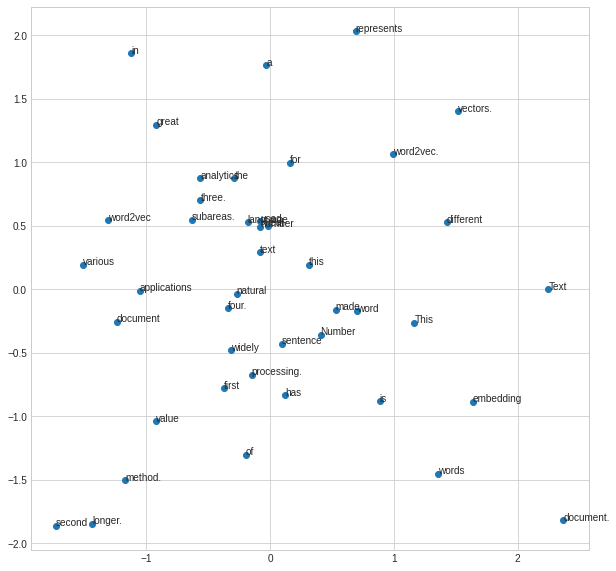

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=result[:, 0], y=result[:, 1])

# we can then annotate the words with all the points
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

#### Quantifying Similarity

The visualization can give us a basic idea regarding which words are similar to each other. However, sometimes (e.g., if we want to cluster words based on their similarities), we need to quantify the similarities.

Luckily, `gensim` provides an attribute (`most_similar()`) to measure the similarity between words in a `word2vec` model.

For instance, if we want to look at what words are most similar to `'document'` in our trained `model`, we can do this:

In [ ]:
model.wv.most_similar(positive=['document'], topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('three.', 0.1391543447971344),
 ('first', 0.11365681886672974),
 ('value', 0.09824228286743164),
 ('Number', 0.09117282927036285),
 ('in', 0.0880718007683754)]

We can find out that these top 5 words are somewhat close to the word `'document'` in the scatter plot above.

What if we want to look at words similar to `'document'` but not similar to `'word'`? We can do this:

In [ ]:
model.wv.most_similar(positive=['document'], negative=['word'], topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('widely', 0.1554654985666275),
 ('language', 0.13933239877223969),
 ('great', 0.11266615986824036),
 ('method.', 0.10966652631759644),
 ('used', 0.10645037144422531)]

You can have multiple word for either `postive=` or `negative=`, or even both.

In [ ]:
model.wv.most_similar(positive=['document', 'sentence'], negative=['word'], topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('first', 0.16968777775764465),
 ('method.', 0.15506719052791595),
 ('a', 0.15224719047546387),
 ('widely', 0.14804601669311523),
 ('language', 0.1341065764427185)]

Comparing the two results above, we can see that the second result makes more sense. It is common practice to have some similar words in the `negative=` argument to fine tune the similar words.

Besides, the float number next to the `most_similar` words are the similarity. Since we represent words as real-value vectors, the similarity is $1-cosine distance$.

We can look at the similarity between any pair of words in our vocabulary (collection of all words):

In [ ]:
model.wv.similarity('document', 'word')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.054307606

## DO IT YOURSELF

Of course, sometimes we want to use the `word2vec` model more than just explore the text contents (similarities). For instance, we may want to use the `word2vec` models to represent the text for classification purposes.

Your task here is to replicate what we did in the __Deep Learning for NLP: Sentiment Analysis__, but instead of using the processed data, we are going to use the actual text data, and you are going to use the `keras.tokenizer` and `gensim.word2vec` to represent the text for classification purposes.

- The text data can be downloaded at [here](http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz);
- [This link](https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456) might be particularly helpful.

Some things to consider:

1. you might want to preprocess your text data, by removing the stop words, punctuations, and so forth. These standardized steps are popularly used in NLP practices. [This notebook](https://github.com/antonio-f/Multilabel-Classification/blob/master/week1/week1-MultilabelClassification.ipynb), particularly code block `177 - 179`, might be useful for that.
2. If you want some extra points, or just like the extra challenge, consider discover the top 50 most frequent words in the dataset, and plot them in a scatter plot. Also, you can look at the `most_similar` words among them to see if you can discover something interesting.


In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2021-06-19 18:40:36--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  58.6MB/s    in 1.4s    

2021-06-19 18:40:38 (58.6 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
!tar -xvf '/content/aclImdb_v1.tar.gz'

In [ ]:
import os

base_dir = '/content/aclImdb/train/neg'
txt_list = []
for dirpath, dirnames, filename in os.walk(base_dir):
    for filename in filename:
        # create full path
        txtfile_full_path = os.path.join(dirpath, filename)
        with open(txtfile_full_path) as f:
            txt_list.append(f.read())

In [ ]:
txt_list[0]

'This is easily the most disappointing, least gratifying movie of the entire so-called blacksploitation genre, which, by the way, are films we generally enjoy a great deal in our home. Rather than being "exploitation" or demeaning, these films actually provide a priceless insight into an era. Well, not Bucktown.<br /><br />In this story, Duke returns to Bucktown to operate the night club left to him by his recently deceased brother. He quickly learns that the city is entirely controlled by a corrupt police force, bleeding protection money out of all the local businesses. Duke resists, and determines that he will rescue the city from the corrupt police. Unfortunately, he does so by calling in a posse of his friends (these people are vaguely explained as some former black-militants who have worked with Duke on "jobs" in the past) and they simply murder the entire police department in cold blood. And literally in the presence of hundreds of witnesses who do nothing to stop it. Ignorance i

In [ ]:
import numpy as np

neg_text = np.array(txt_list)

In [ ]:
base_dir = '/content/aclImdb/train/pos'
txt_list = []
for dirpath, dirnames, filename in os.walk(base_dir):
    for filename in filename:
        # create full path
        txtfile_full_path = os.path.join(dirpath, filename)
        with open(txtfile_full_path) as f:
            txt_list.append(f.read())

In [ ]:
pos_text = np.array(txt_list)